# Logistic Regression

1. Supervised Learning Algorithm
2. Classification problems - Binary Classification, Multiclass Classification

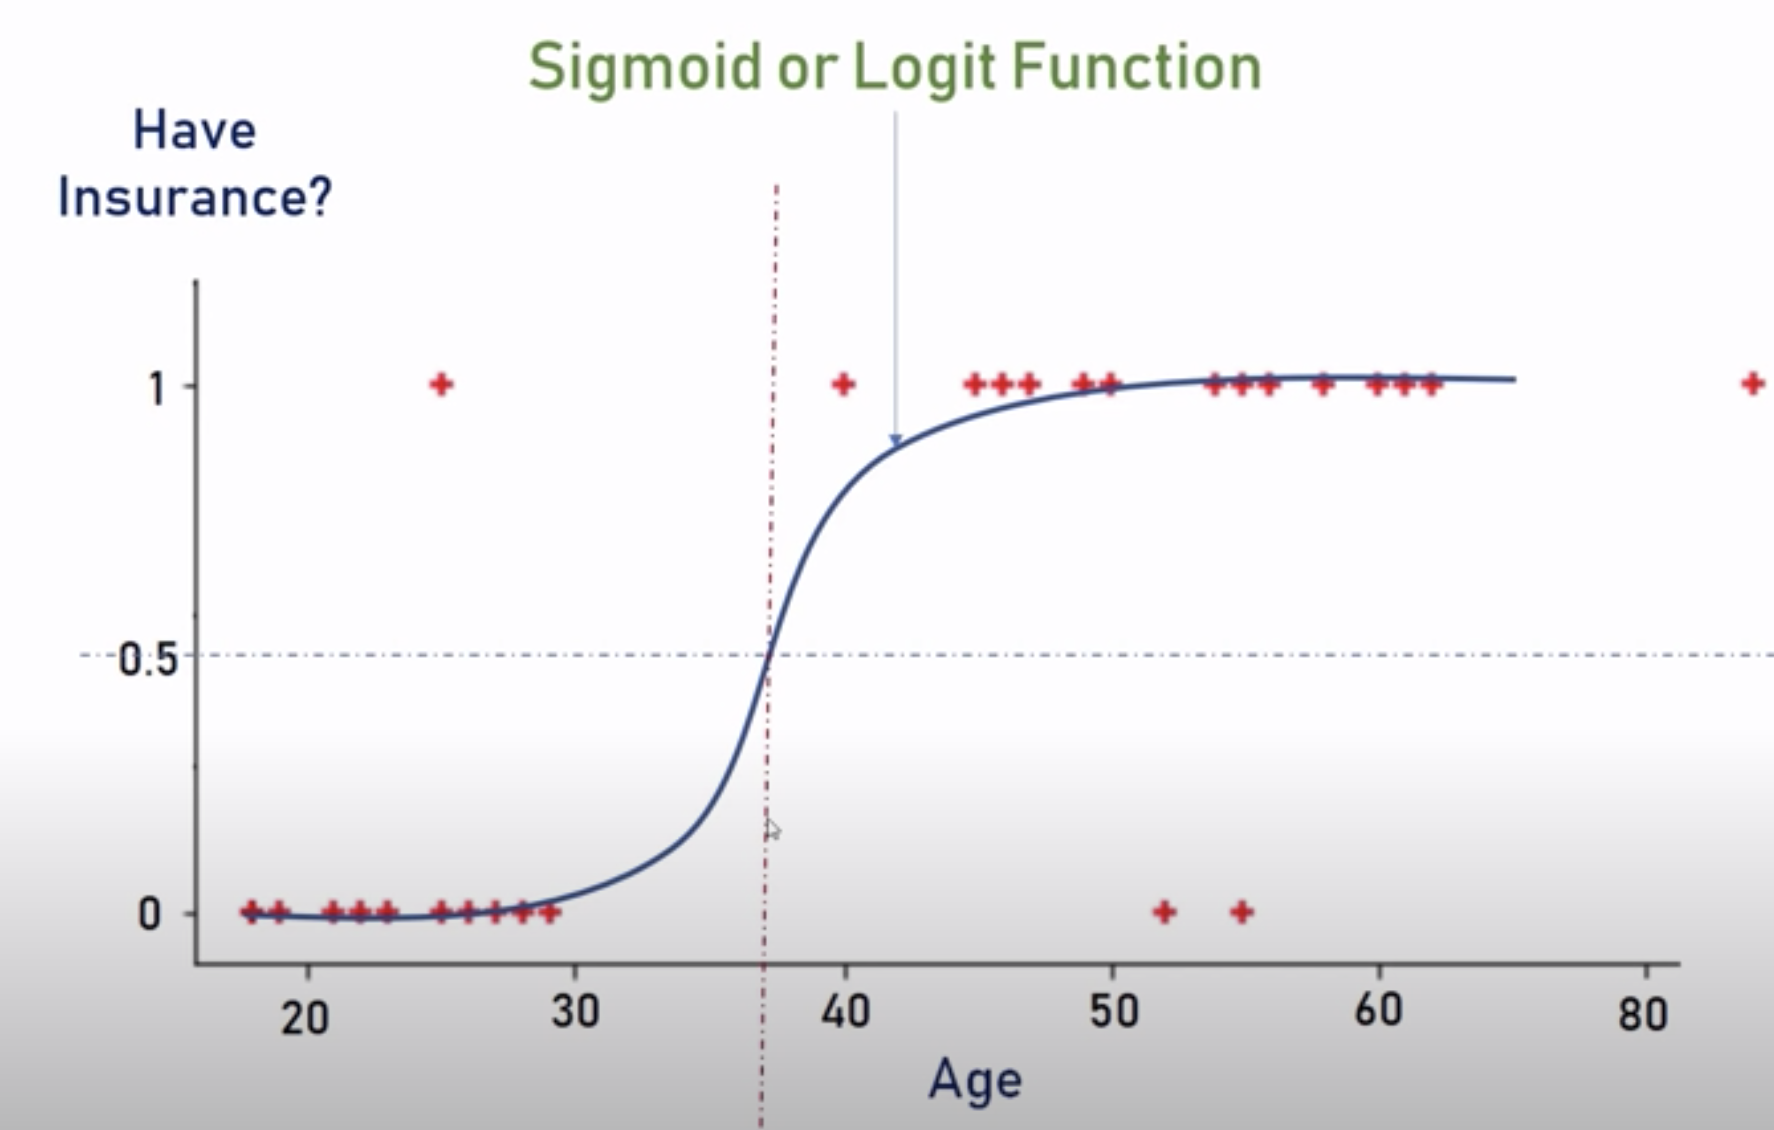

In [63]:
from IPython.display import Image
Image("/Users/priyashaprasad/Desktop/Screenshot 2020-07-05 at 7.12.35 PM.png")

In [64]:
# Importing basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [65]:
# Loading the dataset
df = pd.read_csv('/Users/priyashaprasad/Documents/Summer Analytics Course/SLR/insurance_data.csv')

In [66]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


1. bought_insurance = 0 - > Did not buy insurance
2. bought_insurance = 1 - > Did buy insurance

Text(0,0.5,'Bought_Insurance')

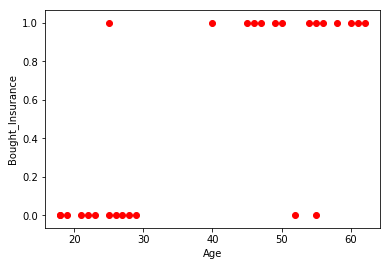

In [10]:
plt.scatter(df['age'],df['bought_insurance'], marker = 'o',color='red')
plt.xlabel('Age')
plt.ylabel('Bought_Insurance')

This graph shows 2 trends.
1. Most of the 'Young' people do not buy insurance 
2. Most of the 'Older' people buy insurance 

In [68]:
df.shape

(27, 2)

In [69]:
X = df[['age']]

In [70]:
X.head()

,age
0,22
1,25
2,47
3,52
4,46


In [71]:
y = df['bought_insurance']

In [72]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: bought_insurance, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)

In [75]:
X_test

,age
17,58
14,49
18,19


In [76]:
y_test

17    1
14    1
18    0
Name: bought_insurance, dtype: int64

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(3, 1)
(24,)
(3,)


Text(0.5,1,'Train Test Split')

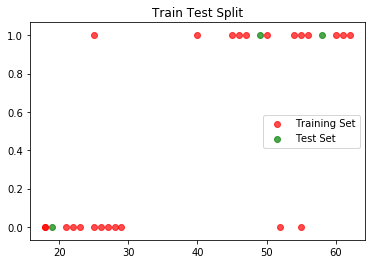

In [78]:
# Visualizing the training and test set 
plt.scatter(X_train, y_train, label = 'Training Set', color='r', alpha = 0.7)
plt.scatter(X_test, y_test, label = 'Test Set', color='g', alpha = 0.7)
plt.legend()
plt.title("Train Test Split")

We see that 2 data points are taken from ages 45 and above and 
1 data point is taken from age below 20

In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
y_pred = model.predict(X_test)

In [83]:
y_pred

array([1, 1, 0])

In [84]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
17,1,1
14,1,1
18,0,0


We see that our model predicts all of the data points in the test data correctly.

The score method - returns the mean accuracy on the given data and labels.

In [88]:
model.score(X_train,y_train)

0.875

The mean accuracy of our model in the training set is 87.5%

In [90]:
model.score(X_test,y_test)

1.0

The mean accuracy of our model in the test set is 100%. Practically, when there is more data, it is very 
unlikely that our model would predict the test data with 100% accuracy.

In [92]:
model.predict_proba(X_test)

array([[0.22435462, 0.77564538],
       [0.31143323, 0.68856677],
       [0.6674572 , 0.3325428 ]])

In [93]:
X_test

,age
17,58
14,49
18,19


The predict_proba method gives the probabilities between two classes - for each data point in the test data.

Meaning that - For age = 58 years, our model tells that there is a 
1. the probability of this person not buying the insurance is 0.224 and 
2. the probability of this person buying the insurance is 0.775 and 
hence, our model predicts the class to be 1

Predicting the class by passing individual values as input

In [94]:
model.predict([[56]])

array([1])

In [95]:
model.predict([[12]])

array([0])